In [105]:
import json
import glob

from matplotlib import pyplot as plt
from matplotlib import markers

from collections import OrderedDict

In [107]:
BUNDLES = OrderedDict(
 SLF_right="easy",
 SLF_left="easy",
 UF_right="easy",
 CC="easy",
 UF_left="easy",
 ILF_left="easy",
 ILF_right="easy",
 ICP_left="medium",
 FPT_right="medium",
 CST_left="medium",
 Cingulum_left="medium",
 OR_right="medium",
 ICP_right="medium",
 Fornix="medium",
 SCP_right="medium",
 POPT_right="medium",
 CST_right="medium",
 SCP_left="medium",
 POPT_left="medium",
 FPT_left="medium",
 OR_left="medium",
 Cingulum_right="medium",
 MCP="medium",
 CP="hard",
 CA="hard",
)

In [24]:
def key2color(k):
    if k == "easy":
        return "b"
    elif k == "medium":
        return "g"
    elif k == "hard":
        return "r"

In [7]:
results=[]
for file in glob.glob("../scores/*"):
    with open(file) as json_file:
        results.append(json.load(json_file))

In [142]:
def show_mean_OL_vs_OR(results):
    plt.figure(dpi=100)
    ax = plt.axes()
    for i, r in enumerate(results):
        plt.text(r["mean_OR"], r["mean_OL"], str(i), transform=ax.transAxes)
    plt.xlabel("Bundle Overreach")
    plt.ylabel("Bundle Overlap") 

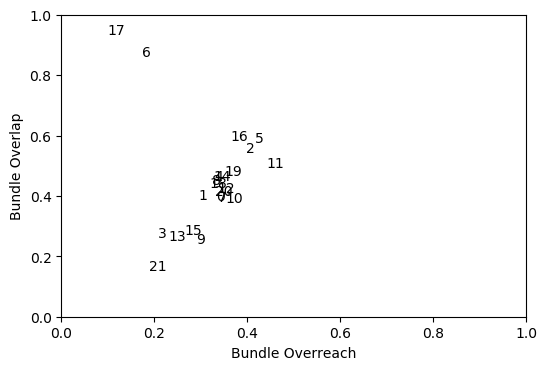

In [143]:
show_mean_OL_vs_OR(results)

In [140]:
def show_IB_vs_F1(results):
    plt.figure(dpi=100)
    ax = plt.axes()
    for i, r in enumerate(results):
        ax.text(r["IB"]/150, r["mean_F1"], str(i), transform=ax.transAxes)
    ax.set_xlabel("Invalid Bundles (/150)")
    ax.set_ylabel("Bundle F1")

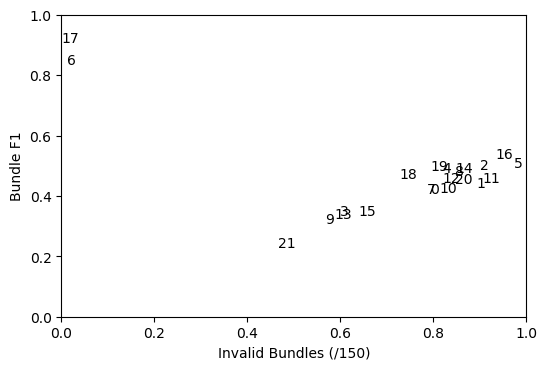

In [141]:
show_IB_vs_F1(results)

In [134]:
def show_every_bundle(results):

    fig, axs = plt.subplots(5, 5, constrained_layout=True, figsize=(15,15),
                            subplot_kw={"xticks": [0,1], "yticks": [0,1]})

    for ax, b in zip(axs.flat, BUNDLES):
        ax.set_title(b)
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        for i,r in enumerate(results):
            #color=plt.get_cmap("tab20")(i/len(results))
            ax.text(r["overreach_per_bundle"][b], r["overlap_per_bundle"][b], str(i),
                      color=key2color(BUNDLES[b]), transform=ax.transAxes)

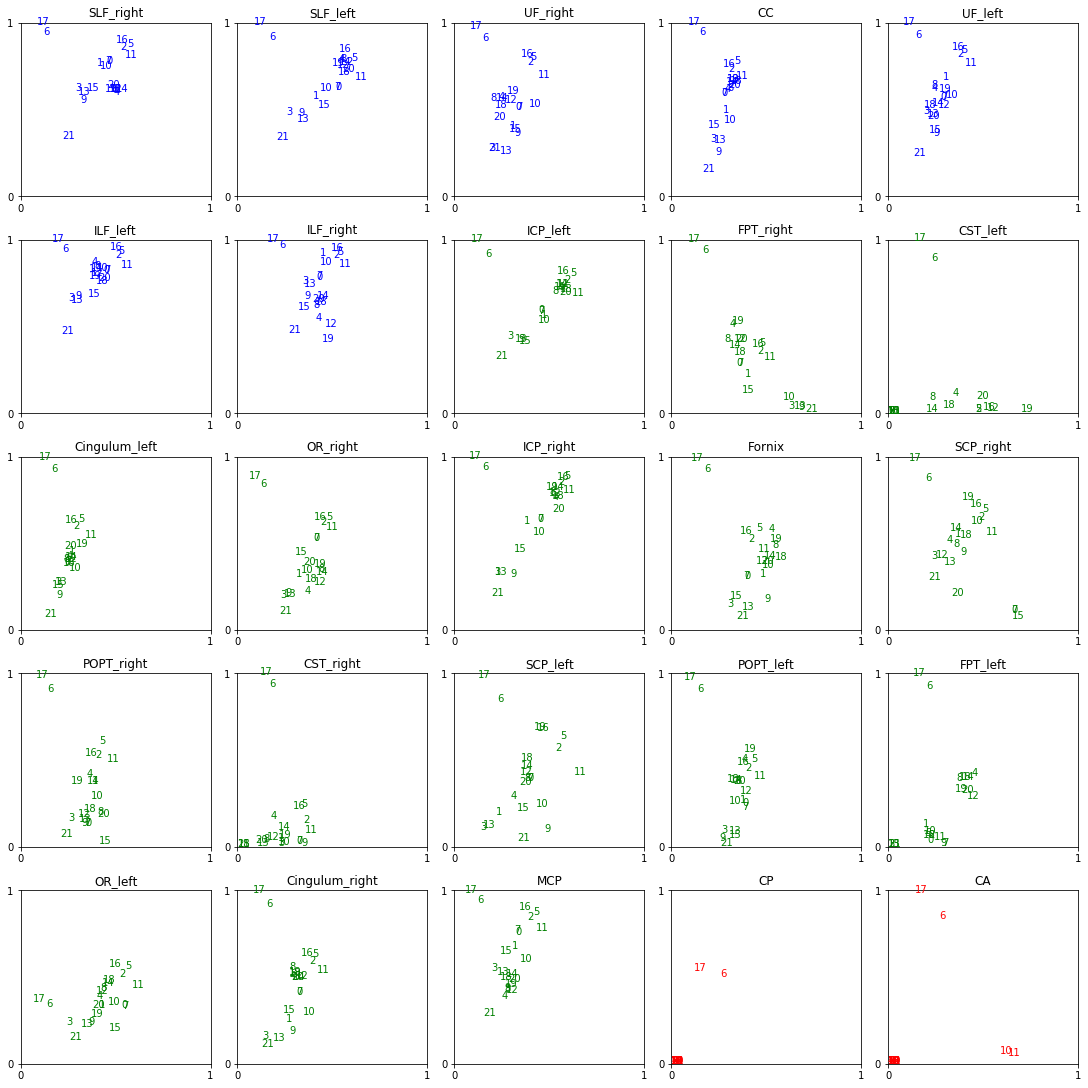

In [135]:
show_every_bundle(results)